## Analysis of News Text according to an input keyword
This script needs several inputs to extract data from the website https://newsapi.org/v2/everything.
It asks for a keyword, the number of articles you want to analyze, an API key (which is available at the website), and a date range.
To demonstrate the usage of the program the input questions are inacticated and instead the following arguments are used:

In this example we will use the keyword 'climate', 100 articles, the API key "e9461662ee4b4adda2d859241c96894a" and articles from 2025-01-31 to 2025-02-21.

Anyway, by deleting the # before the input questions can be reactivated using any parameters you want. 

Also, we need following libraries: requests, pandas, matplotlib

We start by importing necessary libraries and change the input into predefined definitions.

In [52]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import string


main_url = "https://newsapi.org/v2/everything"
#query = input("Please enter your keyword: ")
query = 'climate'
#pages = int(input("Now enter the number of articles as integer (e.g. 10): "))
pages = 10
#API_key = input("Enter your valid API key: ")
API_key = 'e9461662ee4b4adda2d859241c96894a'
#from_date = input("Specify the date range of articles in this format: YYYY-MM-DD \nStarting date: ")
from_date = '2025-01-31'
#to_date = input("Final date: ")
to_date = '2025-02-21'

The first function fetches the data from the news website and uses several arguments: api_key, query, from_date, to_date, language="en", page_size = pages
using the preset parameters and the website url we can get the data with requests and change it into a format that is easier to work with (.jsnon()). To find out if our API request worked, we check its status code which should be 200. If the status code is a different value we switch into the else condition and output the error message so the user can adapt her/his request.

In [45]:
def get_articles(api_key, query, from_date, to_date, language="en", page_size = pages):
    params = {
    'apiKey': API_key,
    'q': query,
    'pageSize': pages,
    'sortBy': 'publishedAt',
    'from': from_date,
    'to': to_date,
    'language': 'en'
    }
    response = requests.get(main_url, params=params)
    if response.status_code == 200:
       print("API is accessible")
       data = response.json()
       return data
    else:
        print(f"API is not accessible: {response.status_code} - {response.text}")

we test the function with our predescribed values

In [64]:
data =get_articles(API_key, query, from_date, to_date, pages);
#display(data, pd.set_option('display.max_colwidth', 10))

API is accessible


Now we use a function that extracts the articles from the data and converts it into a pandas DataFrame which is easier to analyze. As a next step we sort the data and include only the titles, description and publishing date of the articles. The function uses the previously generated data in json format and returns a sorted and filtered pandas DF.

In [61]:
def extract_data(data):
    articles = data.get("articles",[])
    df_data = pd.DataFrame(articles)
    df_data_sorted = df_data[["title", "description","publishedAt"]]
    return(df_data_sorted)

df_data_sorted=extract_data(data)
print(df_data_sorted, pd.set_option('display.max_rows', 5))

                                                title  \
0        13k-Mile 2007 Mercedes-Benz CLK550 Cabriolet   
1               2,400-Mile 2005 Ford GT at No Reserve   
..                                                ...   
6   ​Party featuring Danny Rampling and far-right ...   
7   Trump and Musk Are Returning Us to the Age of ...   

                                          description           publishedAt  
0   This 2007 Mercedes-Benz CLK550 cabriolet has 1...  2025-02-20T13:35:02Z  
1   This 2005 Ford GT was first delivered to AC Co...  2025-02-20T13:30:13Z  
..                                                ...                   ...  
6   OMEARA called off the controversial event, org...  2025-02-20T13:11:00Z  
7   U.S. President Donald Trump, Elon Musk, and th...  2025-02-20T13:03:04Z  

[8 rows x 3 columns] None


The following function enables the user to filter the news description texts according to a user's defined word length.
Again the input command is deactived for demonstration purposes. Here, we set the word lenght as minimum five characters. The function returns a list of words longer than five characters.

In [48]:
def filter_word_length(df_data_sorted):
    #word_length = int(input("Enter the minimum word length as integer: "))
    word_length = 5
    full_text = " ".join(df_data_sorted["description"].dropna())
    clean_text_lower = full_text.lower()
    clean_text_no_punct = clean_text_lower.translate(str.maketrans('', '', string.punctuation))
    clean_text_split = clean_text_no_punct.split()
    filtered_text_word_length = []
    for word in clean_text_split:
        if len(word) > word_length:
            filtered_text_word_length.append(word)
    return filtered_text_word_length

filter_word_length = filter_word_length(df_data_sorted)
print(filter_word_length)


['president', 'donald', 'returning', 'gilded', 'robber', 'barons', 'replete', 'railroad', 'monopolies', 'protections', 'bringing', 'before', 'progressive', 'movement', 'instituted', 'mainstay', 'ultimate', 'fighting', 'championship', 'heavyweight', 'division', 'sixplus', 'white’s', 'contender', 'series', 'graduate', 'saturday', 'julius', 'walker', 'featured', 'seattle', 'attraction', 'months', 'finding', 'myself', 'stranded', 'travel', 'restrictions', 'berlin', 'reread', 'sebald’s', 'saturn', 'picked', 'bookshelf', 'slipped', 'suitcase', 'before', 'belongings', 'storag…', 'environmental', 'assessments', 'different', 'plantbased', 'vastly', 'sustainable', 'animalbased', '“there', 'increasing', 'consensus', 'transitioning', 'towards', 'reduced', 'several', 'funneling', 'million', 'colorado', 'pollution', 'reduction', 'reimbursement', 'programs', 'encourage', 'homeowners', 'electrify', 'houses', 'panels', 'terrible', 'january', 'another', 'reminder', 'planning', 'angeles', 'failed', 'prot

Now we are interested in finding the most common words. For that matter we first use a function that takes the filtered list and counts each word by adding it into a dictionary. The key is the word whereas its value is the value how often this word arises in all the description texts. Finally, the dictionary is sorted starting with the most abundant words.

In [49]:
def word_count(list):
    word_counter = {}
    for word in list:
        if word in word_counter:
            word_counter[word] += 1
        else:
            word_counter[word] = 1
    sorted_word_counter = dict(sorted(word_counter.items(), key=lambda item: item[1], reverse=True))
    return sorted_word_counter

sorted_word_counter = word_count(filter_word_length)
print(sorted_word_counter)

{'economic': 5, 'climate': 5, 'through': 4, 'wednesday': 4, 'billion': 4, 'president': 3, 'movement': 3, 'saturday': 3, 'berlin': 3, 'following': 3, 'science': 3, 'scientists': 3, 'funding': 3, 'astronomers': 3, 'worldwide': 3, 'greater': 3, 'administration': 3, 'donald': 2, 'bringing': 2, 'before': 2, 'ultimate': 2, 'fighting': 2, 'championship': 2, 'environmental': 2, 'sustainable': 2, 'pollution': 2, 'programs': 2, 'another': 2, 'system': 2, 'architecture': 2, 'focusing': 2, 'levels': 2, 'whether': 2, 'strategy': 2, 'within': 2, 'designed': 2, 'report': 2, 'analysts': 2, 'you’ll': 2, 'former': 2, 'features': 2, 'technology': 2, 'international': 2, 'foldable': 2, 'national': 2, 'appeared': 2, 'businesses': 2, 'office': 2, 'european': 2, 'federal': 2, 'germany': 2, 'extreme': 2, 'weather': 2, 'conditions': 2, 'driven': 2, 'utilizing': 2, 'recent': 2, 'global': 2, 'conducted': 2, 'economy': 2, 'fossil': 2, 'change': 2, 'solidarity': 2, 'crompton': 2, 'company': 2, 'available': 2, 'dema

Finally, we want to know the ten most abundant words in the news descriptions. We now use the function top_10_words which takes the dictionary as input and returns a new dictionary including only the Top10 words.

In [50]:
def top_10_words(dict):
    ten_most_common_words = {}
    for key, value in dict.items():
        if len(ten_most_common_words) < 10:
            ten_most_common_words.update({key: value})
    return ten_most_common_words

ten_most_common_words = top_10_words(sorted_word_counter)
print(ten_most_common_words)

{'economic': 5, 'climate': 5, 'through': 4, 'wednesday': 4, 'billion': 4, 'president': 3, 'movement': 3, 'saturday': 3, 'berlin': 3, 'following': 3}


As a grand final we want to see the ouput of top_10_words in a plot. So we extract key and values from the input dictionary. Due to the lenght of the words we need to rotate the x-axis label.

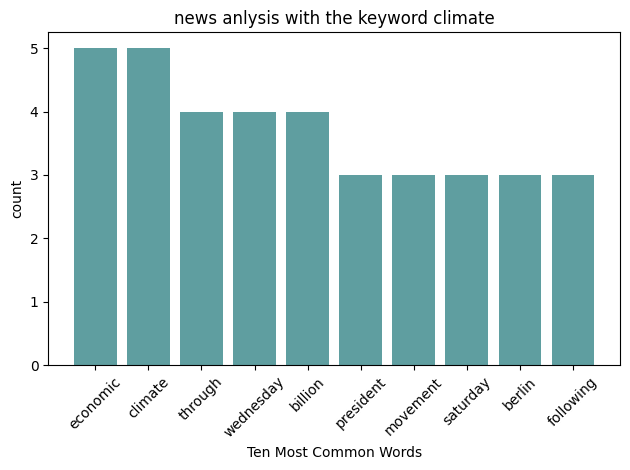

In [ ]:
def plot_Top10_words(dict):
    x_axis = []
    y_axis = []
    for key, value in dict.items():
        x_axis.append(key)
        y_axis.append(value)
    plt.bar(x_axis, y_axis, color = "cadetblue")
    plt.xlabel("Ten Most Common Words")
    plt.ylabel("count")
    plt.title(f"news analysis with the keyword {query}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


plot_Top10_words(ten_most_common_words)